In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
%matplotlib inline

In [6]:
df = pd.read_csv('Admission Prediction.csv')

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


# About data

Serial No. - Just no. of rows starting from '0'

GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose ( out of 5 ) - An SoP is an essay written to convey your goals and your proficiency to the admission Commitee.

Letter of Recommendation ( out of 5 ) - LOR is a letter of recommendation provided by a faculty member of your current or - previous educational institution.

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [9]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [10]:
df.shape

(500, 9)

In [17]:
# filling null values using mean as GRE Score is normally distributed
df['GRE Score']= df['GRE Score'].fillna(df['GRE Score'].mean())

In [18]:
# filling null values using mean as TOEFL Score is normally distributed
df['TOEFL Score']= df['TOEFL Score'].fillna(df['TOEFL Score'].mean())

In [19]:
# filling null values using mode as there are low cardinalilty 
df['University Rating']= df['University Rating'].fillna(df['University Rating'].mode()[0])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


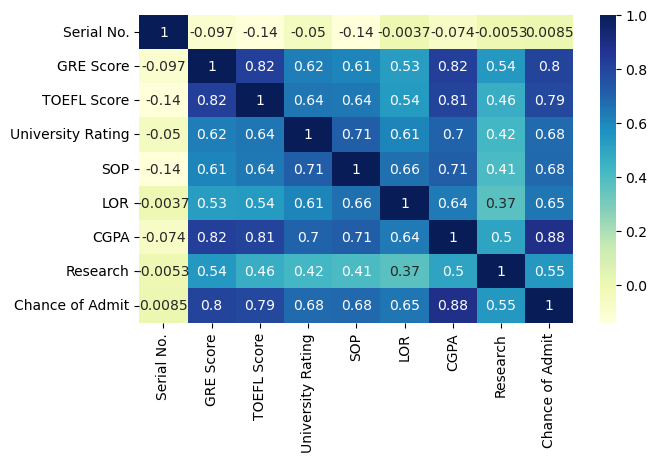

In [21]:
# checking correlation values in heatmap graph
plt.figure(figsize=(7,4))
corr = df.corr()
sns.heatmap(corr,annot =True,cmap="YlGnBu")
plt.show()

# Correlation

GRE Score, TOEFL Score and CGPA features are highly correlated

In [22]:
# decriptive stats
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [23]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [24]:
# saving new dataframe df2 after dropping 'Seria No.' feature

df2 = df.drop(columns=['Serial No.'])

In [25]:
df2.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [26]:
# checking duplicates

df2.duplicated().sum()

0

In [27]:
df2.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


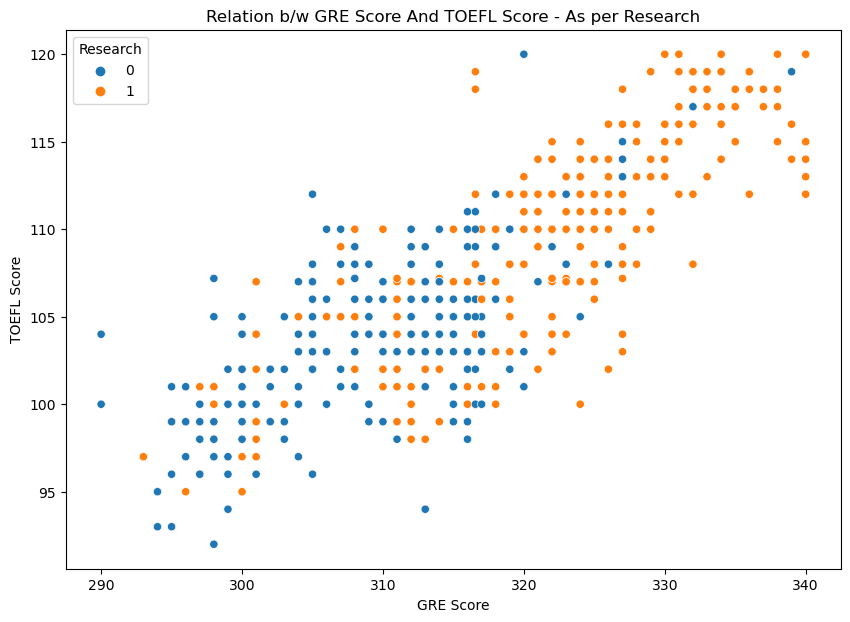

In [28]:
# Scatterplot - GRE Score and TOEFL Score

plt.figure(figsize=(10,7))
sns.scatterplot(x='GRE Score', y= 'TOEFL Score', data =df2,hue='Research')
plt.title('Relation b/w GRE Score And TOEFL Score - As per Research')
plt.show()

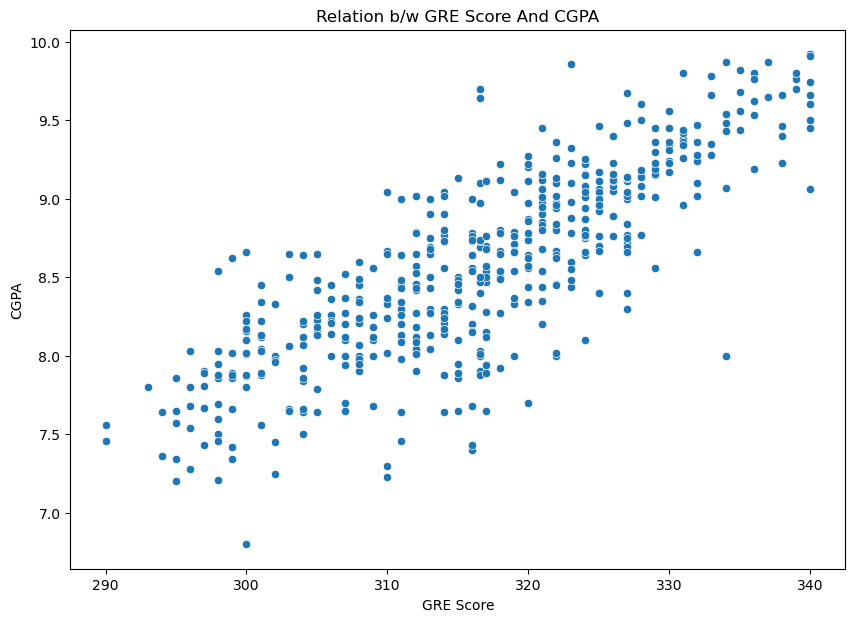

In [29]:
# Scatterplot - GRE Score and CGPA

plt.figure(figsize=(10,7))
sns.scatterplot(x='GRE Score', y= 'CGPA', data =df2)
plt.title('Relation b/w GRE Score And CGPA')
plt.show()

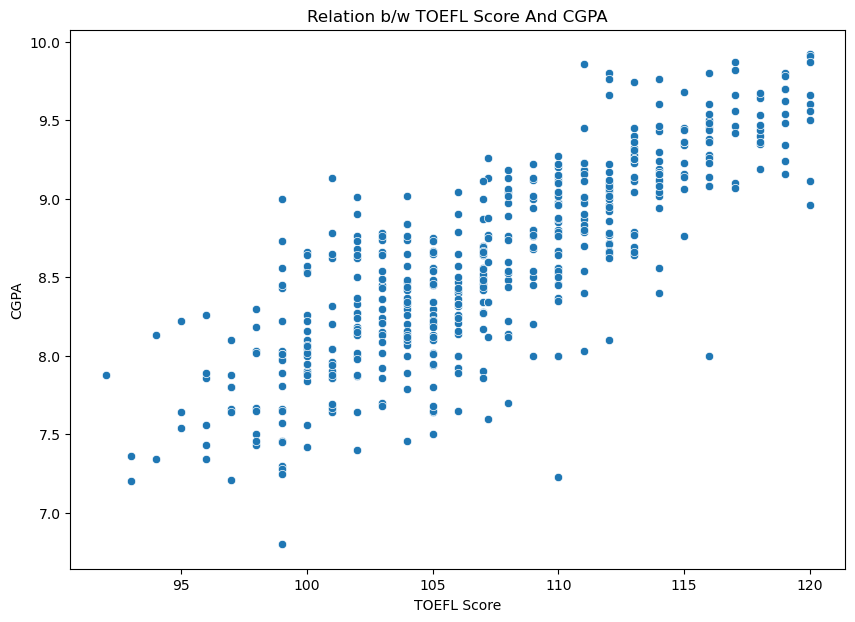

In [30]:
# Scatterplot - TOEFL Score and CGPA

plt.figure(figsize=(10,7))
sns.scatterplot(x='TOEFL Score', y= 'CGPA', data =df2)
plt.title('Relation b/w TOEFL Score And CGPA')
plt.show()

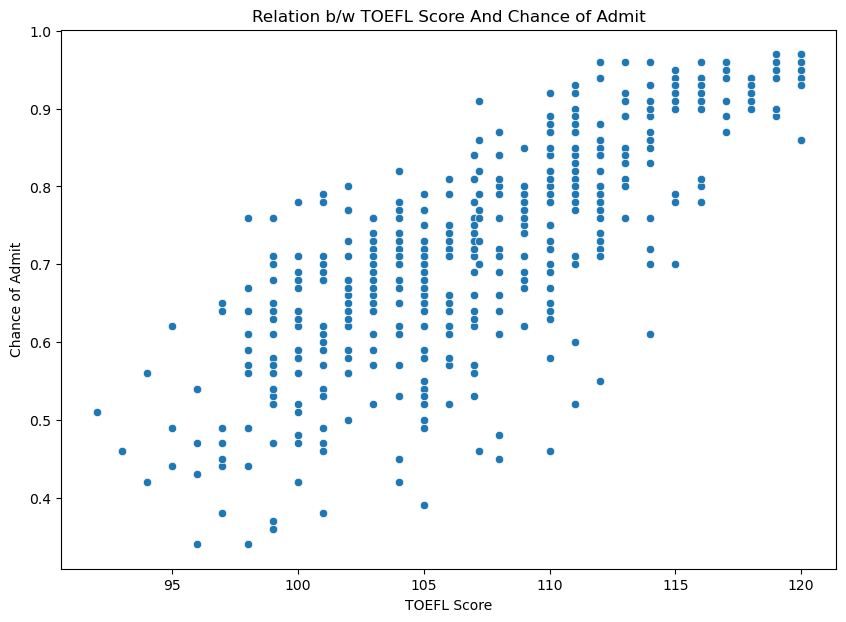

In [31]:
# Scatterplot - TOEFL Score and Chances of Admit

plt.figure(figsize=(10,7))
sns.scatterplot(x='TOEFL Score', y= 'Chance of Admit', data =df2)
plt.title('Relation b/w TOEFL Score And Chance of Admit')
plt.show()

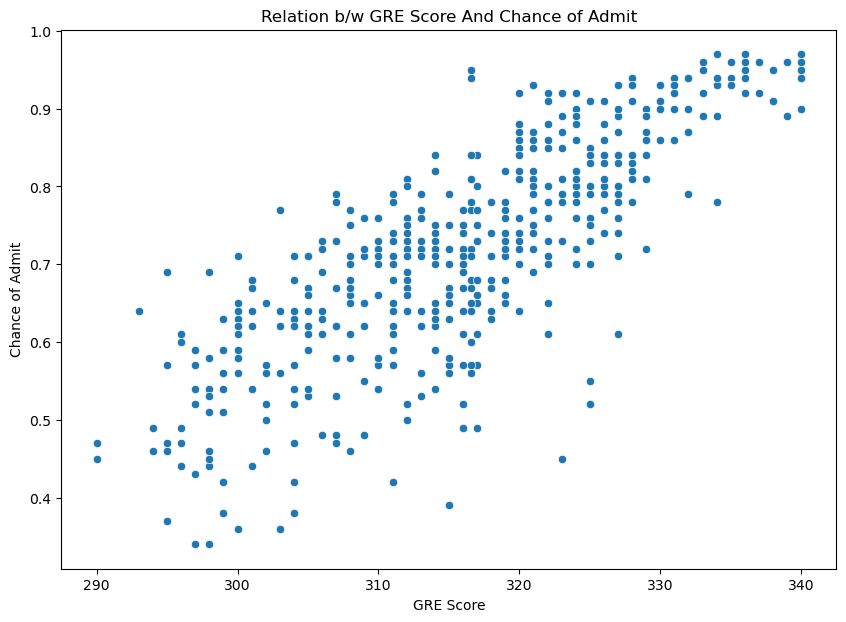

In [32]:
# Scatterplot - GRE Score and Chances of Admit

plt.figure(figsize=(10,7))
sns.scatterplot(x='GRE Score', y= 'Chance of Admit', data =df2)
plt.title('Relation b/w GRE Score And Chance of Admit')
plt.show()

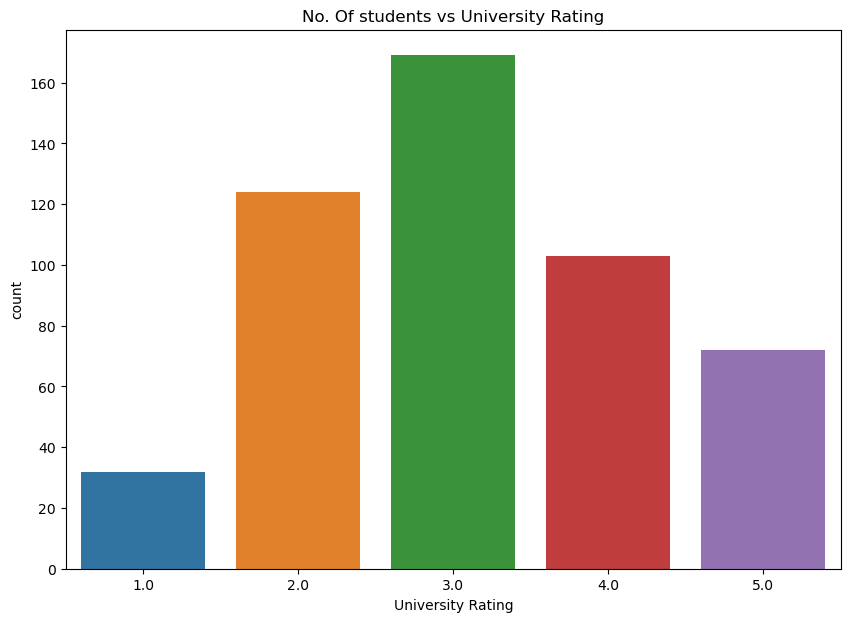

In [33]:
# Count-plot - Univerity Rating

plt.figure(figsize=(10,7))
sns.countplot(x='University Rating', data =df2)
plt.title('No. Of students vs University Rating')
plt.show()

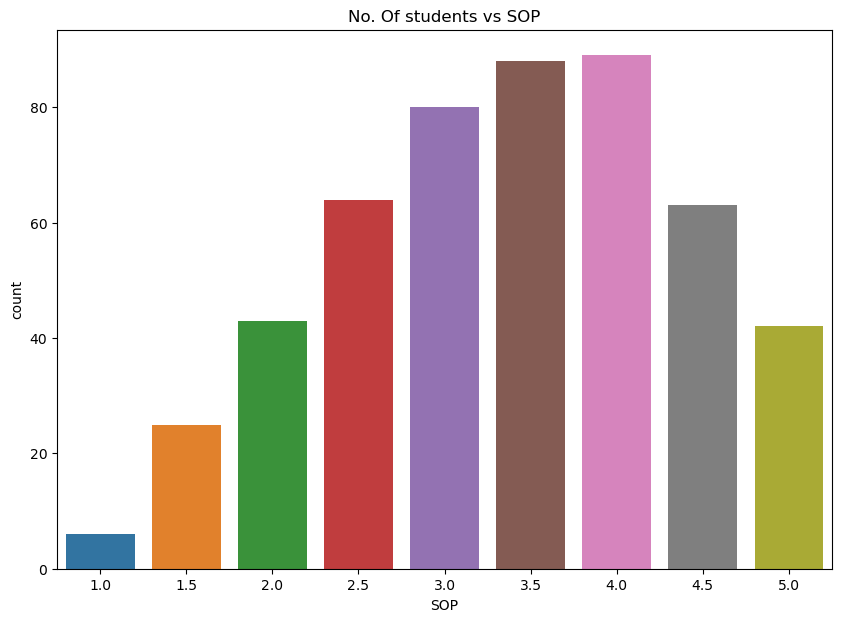

In [34]:
# Count-plot - SOP

plt.figure(figsize=(10,7))
sns.countplot(x='SOP', data =df2)
plt.title('No. Of students vs SOP')
plt.show()

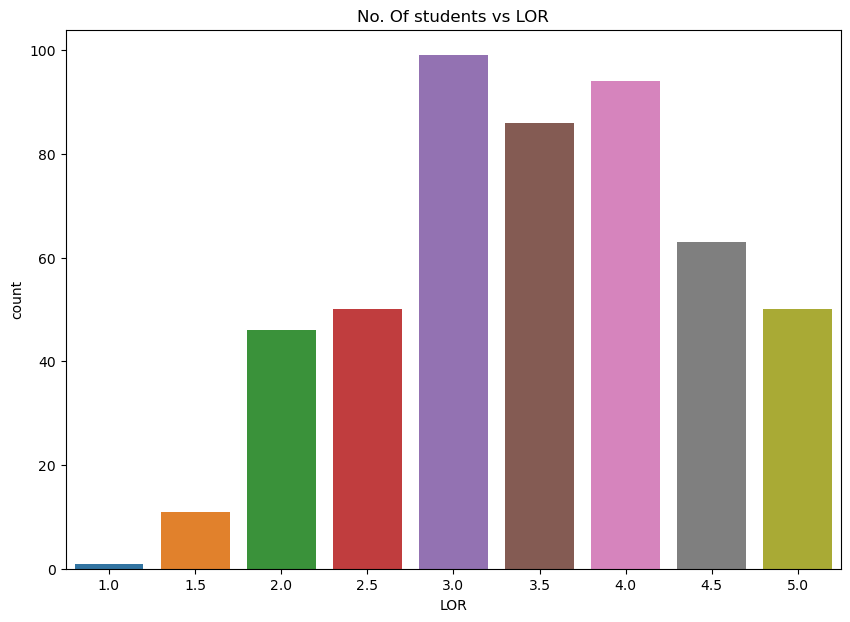

In [35]:
# Count-plot - LOR

plt.figure(figsize=(10,7))
sns.countplot(x='LOR', data =df2)
plt.title('No. Of students vs LOR')
plt.show()

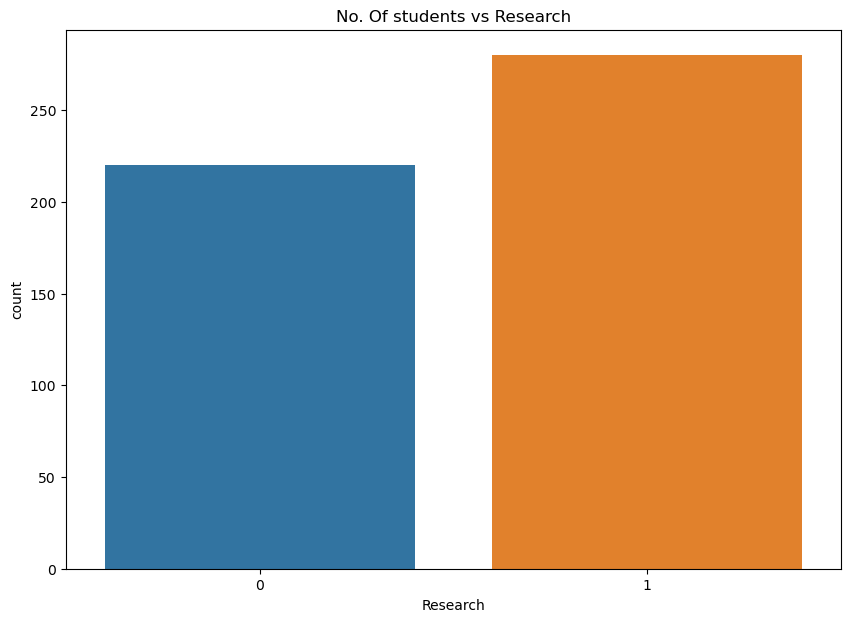

In [36]:
# Count-plot - Research

plt.figure(figsize=(10,7))
sns.countplot(x='Research', data =df2)
plt.title('No. Of students vs Research')
plt.show()

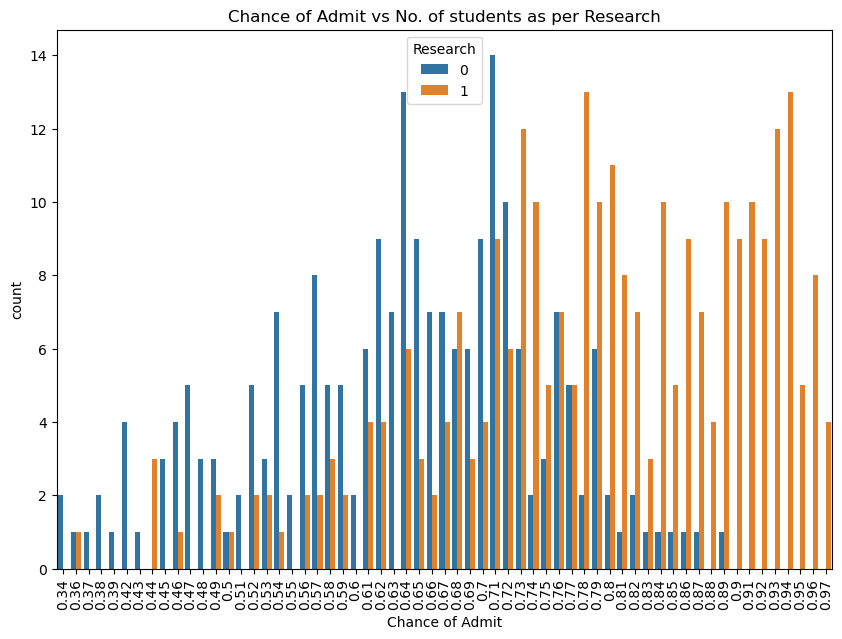

In [37]:
# Count-plot - Chance of Admit vs No. of students as per Research

plt.figure(figsize=(10,7))
sns.countplot(x='Chance of Admit', data =df2, hue = 'Research' )
plt.xticks(rotation=90)
plt.title('Chance of Admit vs No. of students as per Research')
plt.show()

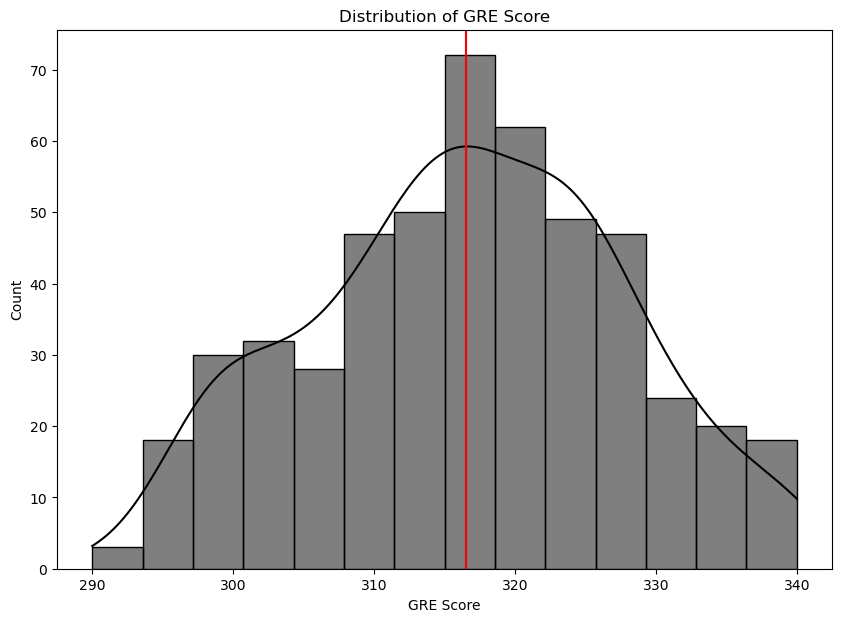

In [38]:
# Histplot - distribution of GRE Score

plt.figure(figsize=(10,7))
sns.histplot(x=df2['GRE Score'],kde=True, color= 'black')
plt.title('Distribution of GRE Score')
plt.axvline(x=df2['GRE Score'].mean())
plt.axvline(x=df2['GRE Score'].median(), color ='red')
plt.show()

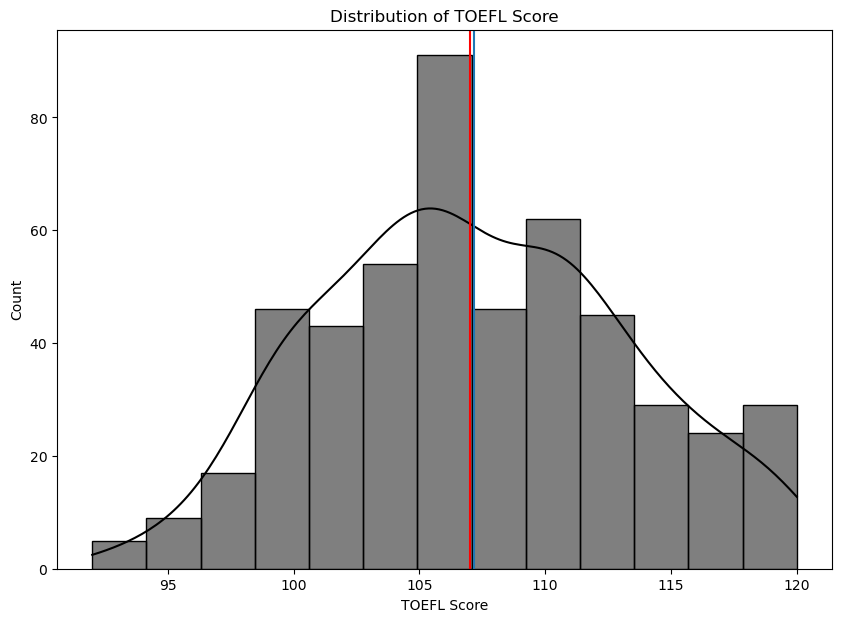

In [39]:
# Histplot - distribution of TOEFL Score

plt.figure(figsize=(10,7))
sns.histplot(x=df2['TOEFL Score'],kde=True, color= 'black')
plt.title('Distribution of TOEFL Score')
plt.axvline(x=df2['TOEFL Score'].mean())
plt.axvline(x=df2['TOEFL Score'].median(), color ='red')
plt.show()

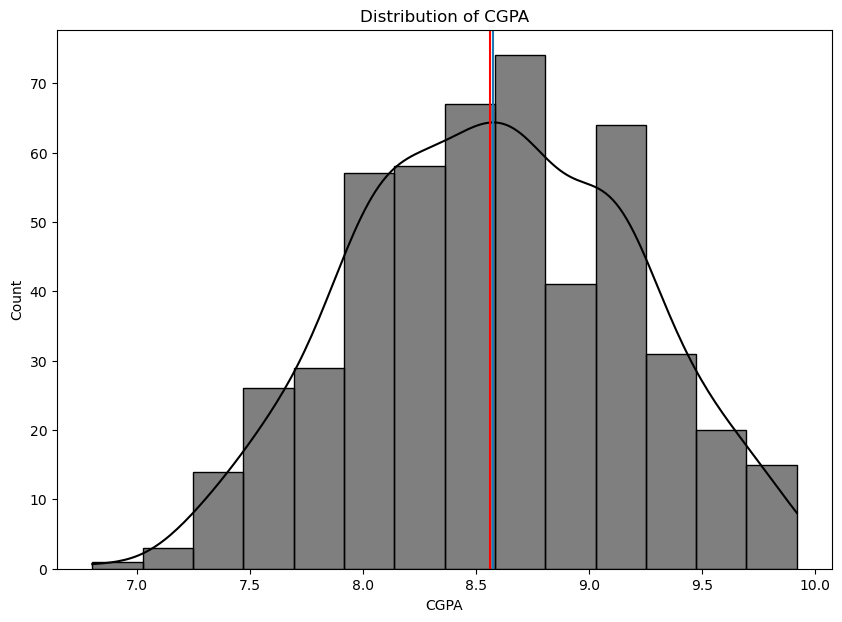

In [40]:
# Histplot - distribution of CGPA

plt.figure(figsize=(10,7))
sns.histplot(x=df2['CGPA'],kde=True, color= 'black')
plt.title('Distribution of CGPA')
plt.axvline(x=df2['CGPA'].mean())
plt.axvline(x=df2['CGPA'].median(), color ='red')
plt.show()

# Insights ---

# Creating x - independent features and y- dependent feature

In [41]:
y= df2.iloc[:,7]

In [42]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [43]:
x=df2.drop(columns=['Chance of Admit'])

In [44]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [45]:
# Standard scaling of columns

scaler= StandardScaler()

In [46]:
arr = scaler.fit_transform(x)

In [47]:
df3= pd.DataFrame(arr)

In [48]:
arr.shape

(500, 7)

In [49]:
#importing VIF to check multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [50]:
[variance_inflation_factor(arr,i) for i in range(arr.shape[1])] 

[4.152734526510754,
 3.7933449809625897,
 2.517271723381032,
 2.7763930557057788,
 2.037449073126331,
 4.654368711830863,
 1.4594109594130855]

In [51]:
vif_df= pd.DataFrame()

In [52]:
vif_df['vif']=[variance_inflation_factor(arr,i) for i in range(arr.shape[1])] 

In [53]:
x.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [55]:
vif_df.index=x.columns

In [56]:
# vif score respectively to column names

vif_df

,vif
GRE Score,4.152735
TOEFL Score,3.793345
University Rating,2.517272
SOP,2.776393
LOR,2.037449
CGPA,4.654369
Research,1.459411


# There is no multicollinearity - no columns will be dropped from independent columns, VIF threshould = 10

In [57]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size=0.25, random_state=90)

In [58]:
# linear regression

lr= LinearRegression()

In [61]:
# fit model on training data

lr.fit(X_train,y_train)

LinearRegression()

In [62]:
# finding accuracy of model

lr.score(X_test,y_test)

0.8557085338478215

In [63]:
# saving the model

pickle.dump(lr, open('linear_model.pickle','wb'))

In [64]:
#loading linear-model

model = pickle.load(open("linear_model.pickle","rb"))

In [65]:
# predicting the output using test data without standard-scaling

model.predict([[337.000000,118.0,4.0,4.5,4.5,9.65,1]])

array([10.88094894])

In [66]:
# transforming te data to standard-scale

scaler.transform([[337.000000,118.0,4.0,4.5,4.5,9.65,1]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.84274116, 1.78854223, 0.78200955, 1.13735981, 1.09894429,
        1.77680627, 0.88640526]])

In [67]:
# predicting the output using test data using standard-scaling

model.predict([[1.84274116, 1.78854223, 0.78200955, 1.13735981, 1.09894429,
        1.77680627, 0.88640526]])

array([0.94901702])

In [68]:
#top 5 columns

df2.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [69]:
# adjusted r2 function

def adjusted_r_sqr(x,y):
    r2=model.score(x,y)
    N =x.shape[0]
    P=x.shape[1]
    adj_r2 = 1-(1-r2)*(N-1)/(N-P-1)
    return adj_r2

In [70]:
# linear regression adjusted r-square

adjusted_r_sqr(X_test,y_test)

0.8470757110865801

# Lasso -L1 regularization

In [71]:
# lassocv calculate

lassocv= LassoCV(fit_intercept=True,max_iter=2000000, cv=5)

In [72]:
# cross validation lasso fit to train data

lassocv.fit(X_train,y_train )

LassoCV(cv=5, max_iter=2000000)

In [73]:
# lasso parameter

lassocv.alpha_

0.0005581813946552113

In [74]:
# lasso fit to train data using alpha from lassocv

lasso= Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0005581813946552113)

In [75]:
# checking acccuracy of Lasso linear model

lasso.score(X_test,y_test)

0.855369696335184

# Ridge- L2 regularization

In [76]:
# ridge cv calculate

ridge_cv= RidgeCV(alphas=(np.random.uniform(0,10,50)),cv=50)

In [77]:
# ridge cv fit to train data

ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([1.34437591e+00, 7.76972136e+00, 9.23850323e-02, 9.21767067e+00,
       6.08192433e+00, 7.75950390e+00, 2.44555220e+00, 6.05795137e+00,
       5.93177033e+00, 2.72480939e+00, 2.91311314e-01, 1.31776577e+00,
       3.29638877e-03, 1.62927541e+00, 3.57398371e+00, 2.78442488e+00,
       8.07074924e+00, 1.50670288e+00, 2.71203792e+00, 4.21411006e+00,
       6.45819430e+00, 6.33576734e-0...
       4.84448302e+00, 6.24237915e+00, 1.13885575e+00, 2.27094395e+00,
       5.75485322e+00, 5.79363485e+00, 5.84316998e+00, 3.63043926e+00,
       1.06457740e+00, 4.42132324e+00, 2.71300147e+00, 4.46288802e+00,
       7.39469836e+00, 8.16562108e+00, 7.80507674e+00, 8.15057897e+00,
       4.79705515e+00, 1.84518660e+00, 2.65050986e+00, 6.00174738e-01,
       1.98480103e+00, 1.76260902e+00, 7.71956013e+00, 1.85367098e+00,
       3.65755979e+00, 7.26479539e-01]),
        cv=50)

In [78]:
# ridge alpha parameter

ridge_cv.alpha_

9.217670673355848

In [79]:
# ridge fit to train data using alpha from ridgecv

ridge_lr= Ridge(alpha=ridge_cv.alpha_)
ridge_lr.fit(X_train,y_train)

Ridge(alpha=9.217670673355848)

In [80]:
# checking accuracy of ridge-linear model

ridge_lr.score(X_test,y_test)

0.8537225046743898

# Elasticnet Regularization

In [81]:
# elasticnetcv values

elasticnet_cv= ElasticNetCV(alphas=None,max_iter=2000000,cv=10)

In [82]:
# fit elasticnetcv to train data

elasticnet_cv.fit(X_train, y_train)

ElasticNetCV(cv=10, max_iter=2000000)

In [83]:
# fit elasticnet to train data and taking parameters from elasticnetcv (l1_ratio, alpha)

elasticnet_lr= ElasticNet(alpha=elasticnet_cv.alpha_,l1_ratio=elasticnet_cv.l1_ratio)
elasticnet_lr.fit(X_train,y_train)

ElasticNet(alpha=0.0006849898558697645)

In [84]:
# checking accuracy of elasticnet linear model

elasticnet_lr.score(X_test,y_test)

0.8554813500156819

# As accuracy score from L1, L2 and elasticnet is nearly same as 85.5%, hence we have created robust model